In [1]:
# import lbraries under speciified aliases
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# import dataset
diamonds = pd.read_csv('diamonds.csv')
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Initial Analysis 
The aim of this project and its analysis will focus solely on the price and carat characterisitcs of each diamond observation. The code below will construct seperate dataframes that copies only the `carat` and `price` columns from the original `diamonds` dataset. These dataframes retains the same 53,940 diamond observations from our original dataset. 

In [3]:
# seperate dataframe that copies only carat and price columns from original dataset
cp = diamonds[["carat","price"]].copy()
cp

,carat,price
0,0.23,326
1,0.21,326
2,0.23,327
3,0.29,334
4,0.31,335
...,...,...
53935,0.72,2757
53936,0.72,2757
53937,0.70,2757
53938,0.86,2757


To make use of the `cp` dataset for data analysis and visualizations, we need to account that there are several diamond observations in `cp` with the same `carat` weight but different `price` . This overlap in values lead to messy data and makes interpreting visuals such as a line graph difficult due to a specific
`carat` value corresponding to multiple `price` values. The code below resolves this issue by using the
`groupby()` function on `cp` to make a new dataframe `carat_price` where each row in `carat` column is an unique value and `price` is the average price of all diamonds of that `carat` weight. Note that `carat_price` has 273 rows or unique `carat` values in ascending order.

In [4]:
carat_price = cp.groupby("carat").mean().reset_index().copy()
carat_price

,carat,price
0,0.20,365.166667
1,0.21,380.222222
2,0.22,391.400000
3,0.23,486.143345
4,0.24,505.185039
...,...,...
268,4.00,15984.000000
269,4.01,15223.000000
270,4.13,17329.000000
271,4.50,18531.000000


Using the describe() function on carat_price , we can see that the average carat size is 1.6088 carats with minimum value being .2 carats and maximum being 5.01 carats. For price , we see the average value as 9242.67 with minimum value as 365.17 and maximum of 18701.00. In interpreting this information, it is important to reconginze that the function is called on carat_price where each price adjacent to each carat observation is an average of prices so the minimum price of 365.17 is the minimum average price.

In [5]:
carat_price.describe()

,carat,price
count,273.000000,273.000000
mean,1.608791,9242.669570
std,0.894875,5606.869496
min,0.200000,365.166667
25%,0.880000,3342.322581
50%,1.560000,10424.000000
75%,2.240000,14481.333333
max,5.010000,18701.000000


To develop a greater understanding of the distribution of carats across our carat_price dataset, the code below uses the `groupby()` function to group the counts of observations into each bin interval listed in bins . While the `describe()` function we used above indicated that our mean carat value is 1.6088 carats, this code output reflects this statistic and further shows the distribution of our 273 unique
carat values. We can see there is a concentration of data/diamonds between one and two carats with the majority of our data being within 0 and 3 carats.

In [7]:
bins = pd.cut(x=carat_price["carat"], bins = [0,1,2,3,4,5])
bins.groupby(bins.values).count()

(0, 1]     81
(1, 2]    100
(2, 3]     75
(3, 4]     13
(4, 5]      3
Name: carat, dtype: int64

The code below generates a line graph with `carat` (explanatory variable) on the x-axis and `price` (response variable) on the y-axis. I chose to utilize a line graph as  both variables are continuous and provides insight on the trends/patterns between the two variables. Looking at the graph, we can observe a positive trend between carat and price where price increases as carat weight increases. We can also see that the trend is relatively steady between one and two carats, but begins to vary past two carats. Although the graph is limited in providing more information on the association, it is a good starting point to recongnize the two variables are indeed associated as there exists a trend. <br>
**Note:** trend invariablility past 2 carats is from the lack of sufficient data for diamonds >2 carats.  

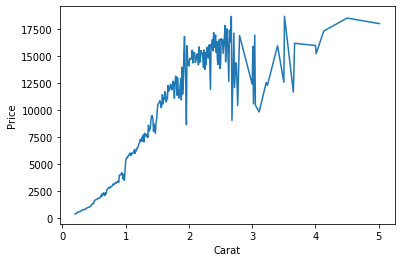

In [9]:
plt.plot("carat", "price", data=carat_price);
plt.xlabel("Carat");
plt.ylabel("Price");

The code below generates a scatter plot with carat , our explanatory variable, on the x-axis and price , our response variable, on the y-axis. In our line graph, we pointed out that past 2 carats, the trend tends to vary with a weaker trend. I wish to understand this inconsistency by plotting values in our carat_price dataset to visualize association and potential outliers. The general outline of our scatterplot resembles that of our line graph, but we're able to view the outliers that appear past three carats. There is a clear positive association between carat and price and we are able to identify that the trend variability in our line graph is due to outliers. A scatterplot is appropriate in this case as we are dealing with two continuous numerical variables and wish to identify association.

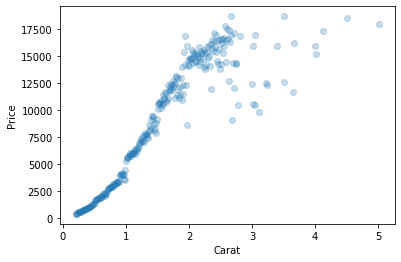

In [10]:
plt.scatter(carat_price["carat"], carat_price["price"], alpha=0.25);
plt.xlabel("Carat");
plt.ylabel("Price");

We grouped the distribution of our data into 5 bins, each representing a scalar/discrete carat value. While we established that the majority of our diamonds are between one and three carats, let's visualize this distribution via histogram. The histogram explains the concentration of our data and why their is a strong linear association between within 3 carats and weak association beyond 3 carats. 

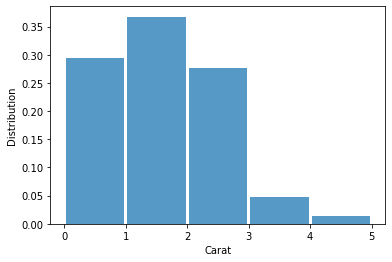

In [11]:
plt.hist(carat_price["carat"], bins=[0,1,2,3,4,5], density=True, rwidth=0.95, alpha=0.75);
plt.xlabel("Carat");
plt.ylabel("Distribution");

## Hypothesis Formation

The question of our analyis is how the carat weight affects the price of a diamond. Our dependent variable is the price of the diamond and our independent variable is the carat weight of such diamond.
carat refers to how much a diamond weighs under the unit and scale of one metric carat as 200 milligrams. Our dependent variable price is measured in US Dollars.

To calculate the correlation coeffecient, ***r*** , we use the .corr() function which computes the linear relationship between price and carat . The function shows that the correlation coefficient on
carat_price is 0.89784.

In [12]:
carat_price.corr()

,carat,price
carat,1.00000,0.89784
price,0.89784,1.00000


The function `r_scatter()` helps us visual the correlation coefficient of our dataset. Observe that a correlation coefficient of 0.89784 reflects a relatively positive strong relation between price and carat where price increases as carat increases.

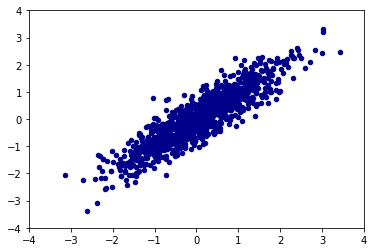

In [14]:
def r_scatter(r):
    x = np.random.normal(0 ,1, 1000)
    z = np.random.normal(0 ,1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    plt.scatter(x, y, color='darkblue', s=20)
    plt.xlim(-4,4)
    plt.ylim(-4,4)
r_scatter(0.89784)

Our regression model as an equation: <br>
**$$price_i = \alpha + \beta * carat_i = e_i$$** <br>
**$H_0$** : $\beta=0$. The true slope of the regression line that predicts price from carat is 0. If the slope of the
computed regression line within our sample is not 0, it is due to chance variation. <br>
**$H_1$** : $\beta \neq{0}$. The true slope of the regression line is not 0 and not due to chance variation.

## Regression Analysis

The code below estimates the regression formula: $price_i = \alpha + \beta * carat_i = e_i$ where $\alpha$ represents the intercept and $\beta$ as the slope. We first store our independent variable, `carat` in variable x and our dependent variable, `price` into y . Since we are trying to estimate a linear equation, we add a constant to our independent variable `x` . Next, using the **Ordinary Least Squares( `OLS()` )** model function from our inported statsmodels.api package, we compute an estimate of the regression slope and intercept given $price_i = \alpha + \beta * carat_i$ . The parameter `missing` instructs the function to drop missing values and further, we call `.fit()` to fit the linear model using the initiated variables provided. Printing the results of the estimate, we see our estimated regression slope is `x1=5625.451615` and estimated intercept is `const=192.492466`. As analysis, for every carat increase, the price of the diamond increaes by 5625.45, which is our slope.

In [18]:
x = carat_price["carat"]
y = carat_price["price"]

X = sm.add_constant(x.values)
results = sm.OLS(y,X, missing = 'drop').fit()
print(results.params)

const     192.492466
x1       5625.451615
dtype: float64


Having estimated our regression slope and itnercept using a linear model, we can graph the regression line by scatterplot visualization. Using the results returned by our `OLS()` function, we multiply the estimated slope to carat and add our intercept to construct the regression line. The regression output visualization provides insight on how the fitted the line looks in regards to our observed data.

In [1]:
plt.plot(x, results.predict(X), color='red');

plt.scatter(x,y);
plt.xlabel("Carat");
plt.ylabel("Price");

NameError: name 'plt' is not defined

To delve into the results of our regression, we call the `summary()` function on the results of our estimatation. The fucntion returns insightful information such as the `correlation coefficient , p- value , confidence interval` and $R^2$ . Interpretation of these values follow in the cells below.


In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     1127.
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           1.56e-98
Time:                        16:18:14   Log-Likelihood:                -2519.4
No. Observations:                 273   AIC:                             5043.
Df Residuals:                     271   BIC:                             5050.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        192.4925    308.384      0.624      0.533    -414.640     799.625
x1          5625.4516    167.588     33.567      0.000    5295.511    5955.392
==============================================================================
Omnibus:                       52.212   Durbin-Watson:                   0.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.206
Skew:                          -1.018   Prob(JB):                     2.12e-21
Kurtosis:                       5.054   Cond. No.                         4.70
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis of table information: <br>
<br>
**Coefficient:** The results show that the under the coefficient column(`coef`), we see the estimated carat slope as `x1` and estimated intercept as `const` . This is a verification of our work. <br>
<br>
**p-value:** The p-value for our regression line slope is under the coloumn `P>|t|` which is 0.000. We understand the p-value to be the probability of observing a slope at least as extreme as our estimated slope under the null hypothesis which states the slope is 0. Given that our p-value is 0.000, there is 0% chance of observing our slope of 5625.4516 in a sample of data if the true slope is 0 (Null Hypothesis). The p-value provides basis as to reject or fail to reject the null hypothesis which. <br>
<br>
**Confidence Interval:** While we can use our p-value to determine whether to reject or fail to reject the null hypothesis, confidence intervals are also handy in giving a threshold for value cutoffs. In our regression result, the 95% confidence interval for the slope is [5295.511,5955.392]. The confidence interval allows us to infer that approximately 95% of the time, we can be confident or expect the true slope to lie within our interval. For example, if we were to conduct this process 100 times, we can expect 95 of our 100 confidence intervals to capture the true slope. We can also use the confidence interval to choose whether to accept or reject the null hypothesis. <br>
<br>
**$R^2$** : $R^2$ represents the percentage of the variance in our dependent variable, `price` that is explained by our independent variable `carat` . Since $R^2$ is simply correlation, $r$ squared, it must be a value between any squared number is positive and the bounds are 0 and 1 because $r$ is between -1 and 1. In our regression model, our $R^2$ is .806 which means approximately 80.6% of the variation in price is explained by carat using the regression line. Therefore, the other 19.4% or variation is explained by some other factor. Like $r$ which measures the strength of linear asosciation between two variables which we want to be near 1, $R^2$ is the percentage of `price` variation explained by `carat` which we also want to be near 1.


## Test Statistic Significance -> Reject/Fail to Reject Null Hypothesis

we can use the p-value and/or confidence order to determine whether we reject or fail to reject our null hypothesis based on our regression results <br>
<br>
**p-value:** If the significance level or cutoff threshold is 5% or 0.05 and our observed p-value is 0.000, we reject the null hypothesis because 0.000<0.05. <br>
**Confidence Interval:** Our confidence interval for the slope is [5295.511,5955.392] and our null hypothesis states the slope is 0. Note that 0 is not in our range of values and thus, we reject the null hypothesis.

The code below generates a residual plot to visual our model's residuals. A residual is an error in our estiamtion/prediction as it measures the vertical distance between each observation and the predicted value on the regression line. This difference is calculated by the first line in our code and we proceed to plot for each carat , how much our predicted price was off by. The residual scatterplot is displayed below.

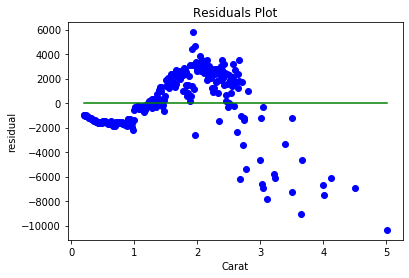

In [21]:
residuals = y-results.predict(X)
plt.scatter(x, residuals, color='blue')
plt.title("Residuals Plot")
plt.xlabel("Carat")
plt.ylabel("residual")

plt.plot(x,[0]*len(x), color='green');

Observing the residual plot above, we can conclude that there is an issue regarding heteroscedasticity which is a change in variance of our residual plots. Note that the variance of the residuals are much higher past two
carat and the overall plot has an unwanted pattern. Since there is a pattern and errors are not random looking, there are mistakes in the model and to potentially fix this error, we may consider incorporating another explanatory variable. In conclusion, the accuracy of the regression line from our model is better for some values of carat and not as much for others.